In [268]:
import numpy as np
import cv2
import os
import shutil
import random
import pandas as pd
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from tkinter import filedialog, Tk
from sklearn.ensemble import RandomForestClassifier

In [269]:
if os.path.isdir("Training") or os.path.isdir("Validation"):
    print("Directory exist")
else:
    os.mkdir("Training")
    os.mkdir("Validation")
    os.mkdir("Training/Fake")
    os.mkdir("Training/Real")
    os.mkdir("Validation/Fake")
    os.mkdir("Validation/Real")

Directory exist


In [270]:
def dirHandler(path, name):
    for i in os.listdir(path):
        for j in os.listdir(path+i):
            if "forg" in i:
                shutil.copyfile(path+i+"/"+j, f"{name}/Fake/{j}")
            else:
                shutil.copyfile(path+i+"/"+j, f"{name}/Real/{j}")
    

In [271]:
dirHandler("sign_data/train/", "Training")
dirHandler("sign_data/test/", "Validation")

In [272]:
train_dir = "Training"
val_dir = "Validation"
CATEGORIES = ["Fake","Real"]

In [273]:
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(CATEGORIES[y[i]])
        plt.axis("off")
    plt.show()

In [274]:
def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])

In [275]:
def get_data(directory, list_dir):
    IMG_SIZE= 100
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for i, img in enumerate(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
            list_dir.append([new_array, class_num])

In [276]:
train_data = []
val_data = []
 
get_data(train_dir,train_data)
get_data(val_dir,val_data)

In [277]:
len(train_data), len(val_data)

(1649, 502)

In [278]:
random.shuffle(train_data)
random.shuffle(val_data)

In [279]:
X_train = []
y_train = []
X_val = []
y_val = []

split_train_test(train_data, X_train,y_train)
split_train_test(val_data, X_val,y_val)

In [280]:
len(X_train), len(X_val), len(y_train), len(y_val)

(1649, 502, 1649, 502)

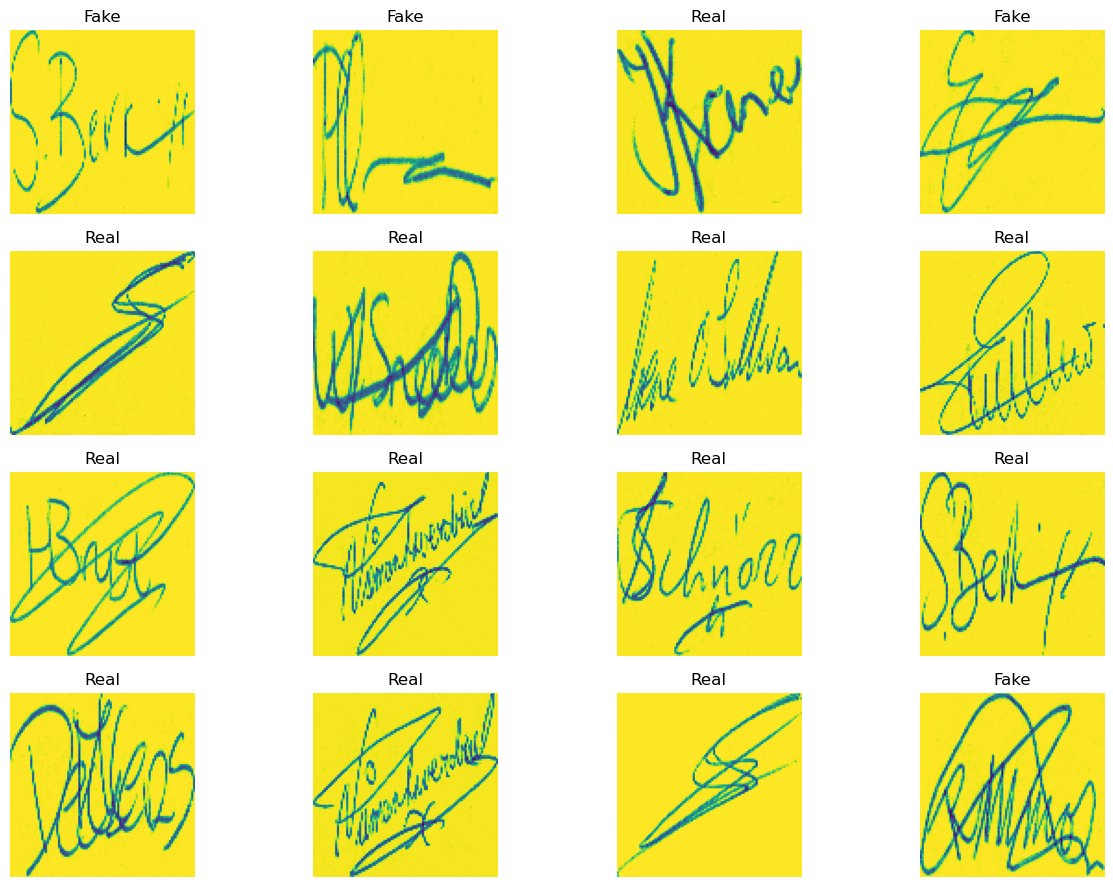

In [281]:
plotImages(X_train,y_train)

In [282]:
def plot_bar_chart_diagram(path_data):
    dic = {}
    for file in os.listdir(path_data):
        dem = 0
        for x in os.listdir(path_data + "/" + file):
            dem += 1
        dic[file] = dem
    print(dic)
    barlist = plt.bar(list(range(len(dic))),
                      list(dic.values()),
                      tick_label=list(dic.keys()))
    plt.show()

{'Fake': 762, 'Real': 887}


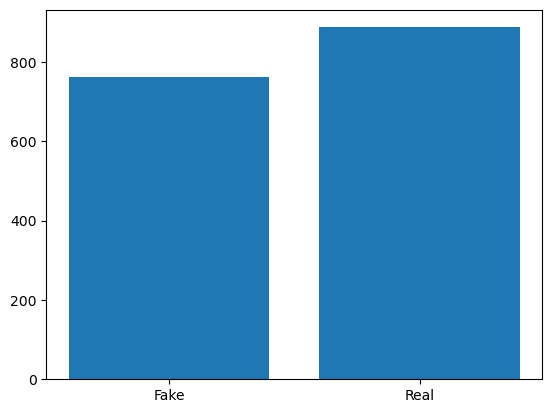

In [283]:
plot_bar_chart_diagram("Training")

{'Fake': 249, 'Real': 253}


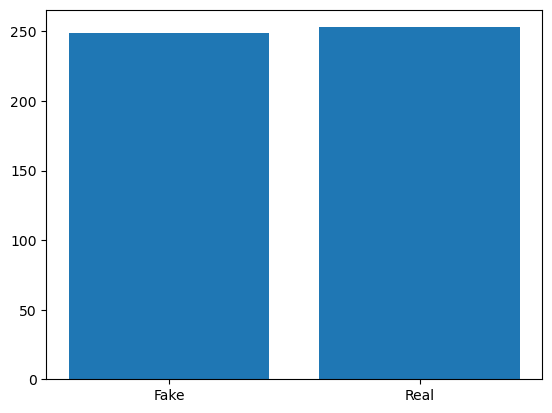

In [284]:
plot_bar_chart_diagram("Validation")

In [285]:
def preprocess(image):
    img = image.reshape(10000)
    return img


Display Grayscale iamge

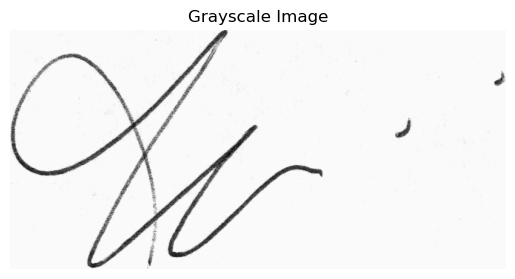

In [286]:
def display_grayscale_image(image):
    plt.imshow(image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()

# Display a grayscale image
img_array = cv2.imread("validation/fake/55.png")
grayscale_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
display_grayscale_image(grayscale_image)


In [287]:
def random_forest_training(trainX, trainY):
    forest = RandomForestClassifier(n_estimators=50)
    forest.fit(trainX, trainY)
    return forest

def random_forest_predictions(testX, forest):
    predictions = forest.predict(testX)    
    return predictions

In [288]:
xtrain = list(map(preprocess, X_train))
xval = list(map(preprocess, X_val))

In [289]:
forest = random_forest_training(xtrain, y_train)
predictions = random_forest_predictions(xval, forest)

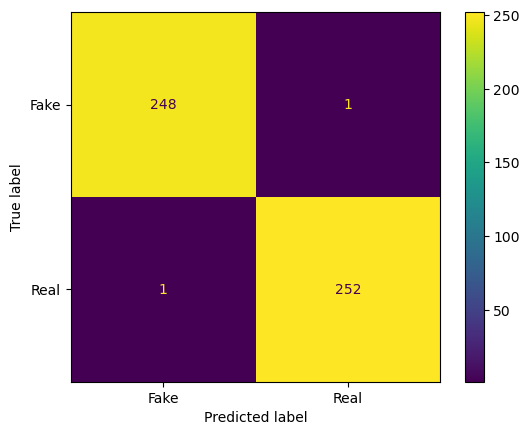

In [290]:
display(ConfusionMatrixDisplay(confusion_matrix(predictions, y_val), display_labels=CATEGORIES).plot())

In [291]:
print("Accuracy Score :",accuracy_score(predictions, y_val))

Accuracy Score : 0.9960159362549801


In [292]:
img_array = cv2.imread("validation/fake/55.png")
new_array = cv2.resize(img_array, (100, 100))
new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY).reshape(10000)

In [293]:
predictedIndex = random_forest_predictions([new_array], forest)

In [294]:
print("Predicted Class is",CATEGORIES[forest.classes_[predictedIndex[0]]])

Predicted Class is Real


In [295]:
# If ground truth labels are available for the validation dataset
# Load validation data and labels
X_val, y_val = [], []
get_data(val_dir, val_data)
split_train_test(val_data, X_val, y_val)
xval = list(map(preprocess, X_val))

# Calculate accuracy of the model on the validation dataset
val_predictions = random_forest_predictions(xval, forest)
val_accuracy = accuracy_score(val_predictions, y_val)
print("Accuracy on Validation Dataset:", val_accuracy)

# Get prediction score for the input image
prediction_score = forest.predict_proba([new_array])
print("Prediction Score for Input Image:", prediction_score)

Accuracy on Validation Dataset: 0.9960159362549801
Prediction Score for Input Image: [[0.04 0.96]]


Image Upload Window

In [297]:
# Create the Tkinter window
window = tk.Tk()
window.title("Signature Verification")

# Set window size and position
window.geometry("600x600")  # Width x Height
window.resizable(False, False)  # Disable resizing

# Define function to perform signature verification
def verify_image(file_path):
    if file_path:
        # Load the selected image
        img = Image.open(file_path)
        img = img.resize((100, 100))  # Resize image to match model input size
        img_array = np.array(img)
        img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        new_array = img_gray.reshape(10000)
        
        # Perform prediction
        predicted_index = forest.predict([new_array])[0]
        prediction_score = forest.predict_proba([new_array])[0][predicted_index]
        predicted_class = CATEGORIES[predicted_index]
        
        # Display the prediction result and accuracy score
        result_label.config(text=f"Predicted Class: {predicted_class}\nAccuracy Score: {prediction_score:.2f}")

# Define function to handle image upload
def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load and display the uploaded image
        img = Image.open(file_path)
        img = img.resize((500,250))  # Resize image for display
        img = ImageTk.PhotoImage(img)
        canvas.create_image(0, 0, anchor="nw", image=img)
        canvas.image = img
        
        # Enable the "Verify" button
        verify_button.config(state="normal")
        
        # Call the verify_image function when "Verify" button is clicked
        verify_button.config(command=lambda: verify_image(file_path))

# Customize window background color
window.config(bg="#f0f0f0")  # Light gray background

# Create a button to upload an image
upload_button = tk.Button(window, text="Upload Image", command=upload_image, bg="#007BFF", fg="white", font=("Arial Bold", 12),
                          borderwidth=2, relief="raised", highlightthickness=0, bd=2, highlightbackground="sky blue")
upload_button.pack(pady=20)

# Create a canvas to display the uploaded image
canvas = tk.Canvas(window, width=500, height=300, bg="white")
canvas.pack()

# Create a "Verify" button (initially disabled until an image is uploaded)
verify_button = tk.Button(window, text="Predict", command=None, bg="#4caf50", fg="white", font=("Arial", 12), state="disabled")
verify_button.pack(pady=10)

# Create a label to display the prediction result and accuracy score
result_label = tk.Label(window, text="", bg="#f0f0f0", font=("Arial", 14))
result_label.pack(pady=10)

# Run the Tkinter event loop
window.mainloop()